# 군집분석

- 군집분석은 각 객체의 유사성을 측정하여 유사성이 높은 대상의 집단을 분류하는 분석 방법
- 사전에 집단을 모른채로 진행하기 때문에 비지도학습에 속한다.

### 군집분석은 크게 계층적 군집분석과 비계층적 군집분석으로 구분할 수 있다.
- 계층적 군집분석 : 전통적인 군집분석 방법으로 군집의 개수를 마지막에 선정한다.
- 비계층적 군집분석 : 군집의 모양도 계층적이지 않지만 군집의 개수를 사전에 선정하고 모형을 개발한다.

#### 다른 분석과의 차이점
- 요인분석 : 요인분석은 유사한 변수를 함께 묶어주는 것이 목적이다.
- 판별분석 : 사전에 집단이 나누어져 있는 자료를 통해 새로운 데이터를 기존의 집단에 할당하는 것이 목적이다.

### 계층적 군집(Hierarchical Clustering)
#### 합병형
- 단일(최단)연결법(single Linkage Method)
- 평균연결법(Average Linkage Method)
- 와드연결법(Ward Linkage Method)
- 완전(최장)연결법(Complete Linkage Method)
- 중심연결법(Centroid Linkage Method)

#### 분리형
- 다이아나 방법

### 분할적 군집(Partitional Clustering)
#### 프로토타입(Prototype-based)
- K-중심 군집 : K-평균(K-means) / K-중앙값(K-median) / K-메도이드(K-medoid)
- 퍼지군집

#### 분포기반
- 혼합분포군집(Mixture Distribution Clustering)

#### 밀도기반
- 중심밀도군집(Center Density Clustering)
- 밀도기반(Grid-based Clustering)

### 거리 함수
#### 연속형 변수
- 유클리디안 거리 : 변수들의 산포 정도가 전혀 감안되어 있지 않다.

    $d(x,y) = \sqrt{(x_{1} - y_{1})^2 + ... + (x_{p} - y_{p})^2} = \sqrt{(x - y)'(x - y)}$
    
    
- 표준화 거리 : 해당변수의 표준편차로 척도 변환한 후 유클리디안 거리를 계산하는 방법으로 척도의 차이, 분산의 차이로 인한 왜곡을 피할 수 있다.

    $d(x,y) = \sqrt{(x - y)'D^{-1}(x - y)}$, $D = diag\{{s_{11},....,s_{pp}}\}$
    
    
- 마할라노비스 거리 : 변수들의 산포를 고려하여 이를 표준화한 거리로 두 벡터 사이의 거리를 표본공분산으로 나눠주어야 하며 그룹에 대한 사전 지식이 필요하다.

    $d(x,y) = \sqrt{(x - y)'S^{-1}(x - y)}$, $S = \{S_{ij}\}는 공분산 행렬$


- 체비셰프 거리 : $d(x,y) = max_{i}|x_{i} - y_{i}|$
- 맨하탄 거리 : 최단거리 계산시 사용

    $d(x,y) = \sum_{i = 1}^p$$|x_{i} - y_{i}|\over (x_{i} + y_{i})$
    
- 민코우스키 거리 : 맨하탄 거리와 유클리디안 거리를 한 번에 표현한 공식

    $d(x,y) = [\sum_{i = 1}^p$ $|x_{i} - y_{i}|^m]$$^{1/m}$, $m = 1, m = 2$

#### 범주형 변수

- 자카드 거리 
    $1 - J(A, B) $= $|A\cup B| - |A\cap B|\over |A\cup B|$
    
    
- 자카드 계수 = $|A\cap B|\over |A\cup B|$


- 코사인 거리
    $d_{cos}(A,B) = $1 - $A\cdot B\over ||A||_{2}\cdot ||B||_{2}$
    
    
- 코사인 유사도
    $cosine similarity = $$A\cdot B\over ||A||_{2}\cdot ||B||_{2}$


In [262]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.neighbors import DistanceMetric
# 위 패키지에서 라이브러리 보면 여러 종류가 있음

In [263]:
x1 = [1, 3, 5, 67, 23, 514]
x2 = [23, 534, 123, 45, 99, 7]

In [264]:
euc = distance.euclidean(x1, x2) # 유클리디안
cbs = distance.chebyshev(x1, x2) # 체비셰프
cbr = distance.canberra(x1, x2) # 캔버라
cs = distance.cosine(x1, x2) # 코사인
jcd = distance.jaccard(x1, x2) # 자카드
mks = distance.minkowski(x1, x2) # 민코우스키

In [265]:
print(euc)
print(cbs)
print(cbr)
print(cs)
print(jcd)
print(mks)

748.1163011190172
531
4.619876472258196
0.9616414825826467
1.0
748.1163011190172


***

## 계층적 군집분석
- n개의 군집으로 시작해 점차 군집의 개수를 줄여 나가는 방법
- 합병형 방법 & 분리형 방법

### 종류

#### 최단연결법
- $n * n$ 거리 행렬에서 거리가 가장 가가운 데이터를 묶어서 군집을 형성한다.
- 군집과 군집 또는 데이터와의 거리를 계싼 시 최단거리를 게산하여 거리행렬을 수정한다.
- 수정된 거리행렬에서 거리가 가까운 데이터 또는 군집을 새로운 군집으로 형성한다.

#### 최장연결법
- 군집과 군집 또는 데이터와의 거리를 계산할 때 최장거리를 거리로 계산하여 거리행렬을 수정하는 방법이다.

#### 평균연결법
- 군집과 군집 또는 데이터와의 거리를 계산할 때 평균을 거리로 계산하여 거리행렬을 수정하는 방법이다.

#### 와드연결법
- 군집 내 편차들의 제곱합을 고려한 방법으로 군집 간 정보의 손실을 최소화하기 위해 군집화를 진행한다.


### 군집화
- 거리행렬을 통해 가장 가까운 거리의 객체들 간의 관계를 규명하고 덴드로그램을 그린다.
- 군집의 개수를 변화해 가면서 적절한 군집의 수를 선정한다.
- 대부분 5개 이상의 군집은 잘 활용하지 않는다.

In [266]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
%matplotlib inline

In [267]:
data = pd.read_csv('/Users/kisehyun/study_code/ADP/21th/csv/datasets/USArrests.csv')

In [268]:
data.head(7)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1


#### 1) 최장 연결법

In [269]:
linked = linkage(data.iloc[:, 1:], 'complete')

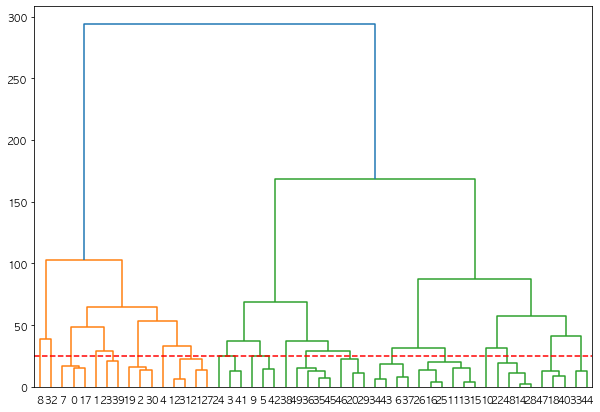

In [270]:
plt.figure(figsize = (10, 7))
dendrogram(linked, leaf_rotation = 0, leaf_font_size = 10)
plt.hlines(25, 0, 500, colors = 'red', linestyles = '--')
plt.show()

In [271]:
cut_tree = fcluster(linked, t = 25, criterion = 'distance')

In [272]:
cut_tree_df = pd.DataFrame({'pred' : list(cut_tree), 'name' : data.iloc[:,0].tolist()})

In [273]:
cut_tree_df.pred.value_counts()

16    6
15    4
7     4
17    4
12    4
3     3
19    3
6     3
9     3
13    3
20    2
4     2
10    2
18    1
1     1
14    1
2     1
8     1
5     1
11    1
Name: pred, dtype: int64

#### 2) 최단 연결법

In [274]:
linked = linkage(data.iloc[:, 1:], 'single')

In [275]:
cut_tree = fcluster(linked, t = 30, criterion = 'distance')

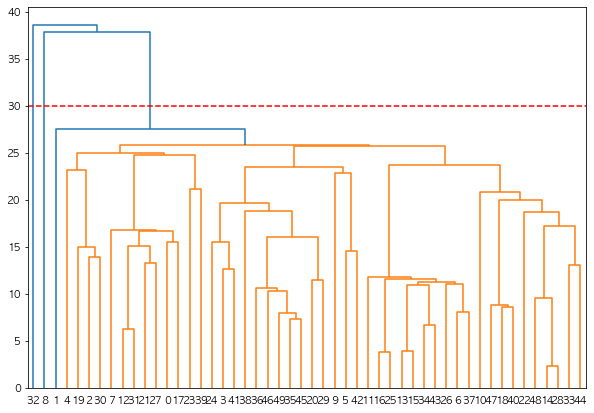

In [276]:
plt.figure(figsize=(10, 7))
dendrogram(linked, leaf_rotation=0,
           leaf_font_size=10)
plt.hlines(30, 0, 500, colors = 'red', linestyles = '--')
plt.show()

y = 30에서 자른다.

In [277]:
cut_tree_df = pd.DataFrame({'pred' : list(cut_tree), 'name' : data.iloc[:,0].tolist()})

In [278]:
cut_tree_df.pred.value_counts()

1    48
2     1
3     1
Name: pred, dtype: int64

#### 3) 평균 연결법

In [279]:
linked = linkage(data.iloc[:, 1:], 'average')

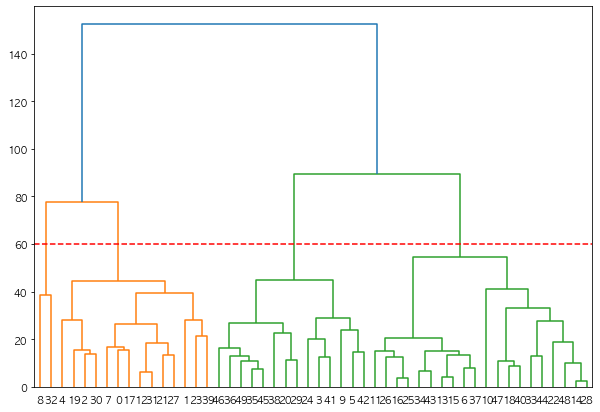

In [280]:
plt.figure(figsize=(10, 7))
dendrogram(linked, leaf_rotation=0,
           leaf_font_size=10)
plt.hlines(60, 0, 500, colors = 'red', linestyles = '--')
plt.show()

In [281]:
cut_tree = fcluster(linked, t = 60, criterion = 'distance')

 y = 60에서 자른다

In [282]:
cut_tree_df = pd.DataFrame({'pred' : list(cut_tree), 'name' : data.iloc[:,0].tolist()})

In [283]:
cut_tree_df.pred.value_counts()

4    20
2    14
3    14
1     2
Name: pred, dtype: int64

#### 4) 와드연결법

In [284]:
linked = linkage(data.iloc[:, 1:], 'ward')

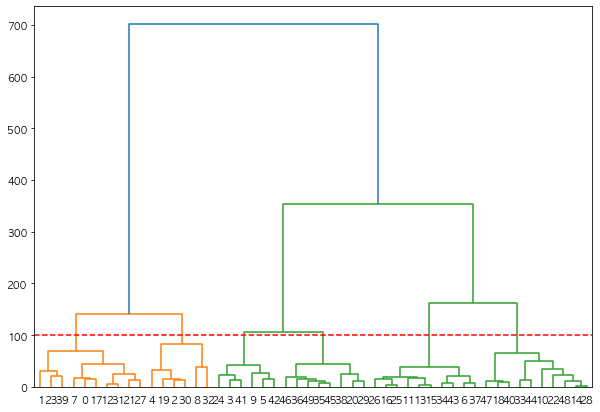

In [285]:
plt.figure(figsize=(10, 7))
dendrogram(linked, leaf_rotation=0,
           leaf_font_size=10)
plt.hlines(100, 0, 500, colors = 'red', linestyles = '--')
plt.show()

In [286]:
cut_tree = fcluster(linked, t = 100, criterion = 'distance')

y = 100에서 자른다

In [287]:
cut_tree_df = pd.DataFrame({'pred' : list(cut_tree), 'name' : data.iloc[:,0].tolist()})

In [288]:
cut_tree_df.pred.value_counts()

1    10
5    10
6    10
4     8
2     6
3     6
Name: pred, dtype: int64

***

## 비계층적 군집분석

### K-평균 군집분석
- 주어진 데이터를 k개의 클러스터로 묶는 알고리즘으로 각 클러스터와 거리 차이의 분산을 최소화 하는 방식으로 동작한다.

|장점|단점|
|---|---|
|- 알고리즘이 단순하며 빠르게 수행|- 군집의 수, 가중치와 거리 정의가 어렵다.|
|- 게층적 군집분석에 비해 많은 양의 데이터를 다룰 수 있다.|사전에 주어진 목적이 없으므로 결과 해석이 어렵다.|
|- 내부구조에 대한 사전정보가 없어도 의미있는 자료 구조를 찾을 수 있다.|- 잡음이나 이상치의 영향을 많이 받는다.|
|- 다양한 형태의 데이터에 적용이 가능하다.|- 초기 군집수 결정이 어렵다.|

In [289]:
from sklearn.cluster import KMeans

In [290]:
df = pd.read_csv("//Users/kisehyun/Downloads/나/ADP실기/PART 05 실습용 데이터/credit_final.csv")

In [291]:
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [292]:
data = df.iloc[:, 1:]

In [293]:
km = KMeans(n_clusters = 2, random_state = 527).fit(data)

In [294]:
pd.Series(km.labels_).value_counts()

0    827
1    173
dtype: int64

In [295]:
df['cls'] = km.labels_

In [296]:
km_table = pd.crosstab(df['credit.rating'], df.cls)
km_table

cls,0,1
credit.rating,,
0,228,72
1,599,101


In [297]:
(km_table.loc[0,0] + km_table.loc[1,1]) / df.shape[0]

0.329

전체 변동에서 군집 간 변동이 차지하는 비율인 (between_SS / total_SS)이 1에 가까울수록 군집이 잘 분류되었다고 판단할 수 있다.
#### inertia
- 각 중심점에서 군집의 데이터간의 거리를 합산한 것으로 군집의 응집도를 나타낸다. 이 값이 작을수록 응집도가 높게 군집화가 잘되었다고 평가할 수 있다.

In [298]:
cls_n = range(2, 11)
inertia_list = []
SS_list = []

In [299]:
for k in cls_n :
    model = KMeans(n_clusters = k, random_state = 326).fit(data)
    inertia_list.append(model.inertia_)
    df['cls'] = model.labels_
    km_table = pd.crosstab(df['credit.rating'], df.cls)
    rat = (km_table.loc[0,0] + km_table.loc[1,1]) / df.shape[0]
    SS_list.append(rat)

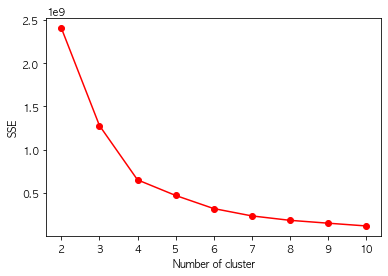

In [300]:
plt.plot(cls_n, inertia_list, marker = 'o', color = 'r')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

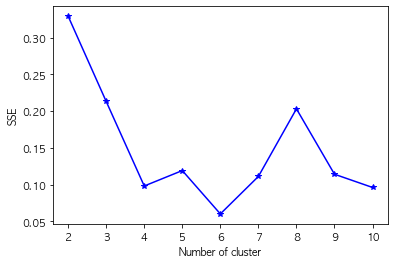

In [301]:
plt.plot(cls_n, SS_list, marker = '*', color = 'b')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

scree plot 과 달리 변동을 지표로 사용할 경우 k = 2일 때 가장 군집이 잘 분류된다.

아마도 실제 레이블인 credit.rating과 비교를 해서 그럴 수 있다. -> 위 데이터는 타겟 변수가 있지만 일반적으로 비지도학습이기 때문에 비교 대상이 없다.

***
### 혼합 분포 군집

#### 모형 기반의 군집방법으로 데이터 k개의 모수적 모형(흔히 정규분포 또는 다변량 정규분포를 가정함)의 가중합으로 표현되는 모집단 모형으로부터 나왔다는 가정하에서 모수와 함께 가중치를 자료로부터 추정하는 방법

#### k개의 각 모형은 군집을 의미하며 각 데이터는 추정된 k개의 모형 중 어느 모형으로부터 나왔을 확률이 높은지에 따라 군집의 분류가 이루어진다.

#### 흔히 혼합모형에서의 모수와 가중치의 추정(최대가능도추정)에는 **EM 알고리즘**이 사용된다.

#### 특징
- 확률분포를 도입하여 군집화를 수행
- 서로 다른 크기나 모양의 군집을 찾을 수 있다.
- EM알고리즘을 이용하기 때문에 데이터가 커지면 수렴에 시간이 걸릴 수 있다.
- 군집의 크기가 너무 작으면 추정의 정도가 떨어지거나 어려울 수 있다.
- 이상치 자료에 민감하므로 사전에 조치가 필요하다.

#### 혼합분포모형으로 설명할 수 있는 데이터의 형태
- 자료의 분포형태가 다봉형의 형태 -> n(3 이상)의 정규분포 결합을 통해 설명이 가능
- 이변량 정규분포의 결합

In [302]:
from sklearn.mixture import GaussianMixture

In [303]:
df = df.iloc[:, :-1]

In [304]:
gmm = GaussianMixture(n_components = 2, random_state = 326).fit(df)

In [305]:
labels = gmm.predict(df)

In [306]:
df['cls'] = labels

In [307]:
pd.crosstab(df.cls, df['credit.rating'])

credit.rating,0,1
cls,,
0,30,89
1,270,611


***
### 평균 이동(Mean Shift)

#### 평균이동은 k-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행한다. 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동한다.
#### 주어진 모델의 확률 밀도 함수를 찾기 위해 KDE(kernel nebsity estimation)를 이용한다.

#### 평균이동은 군집의 개수를 지정할 필요가 없기 때문에 대역폭 크기를 어떤 값으로 지정하냐에 따라 군집화의 품질이 결정된다.

In [308]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs

In [309]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

meanshift= MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6 7]


일반적으로 bandwidth 값을 작게 할수록 군집 개수가 많아진다.

In [310]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


estimate_bandwidth는 최적화된 bandwidth 값을 반환한다.

In [311]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile=0.2)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.444


In [312]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile=0.2)

meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


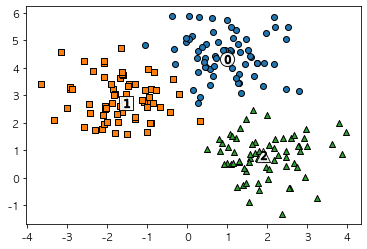

In [313]:
clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()

평균이동의 장점은 좀 더 유연한 군집화가 가능하다는 것이다. 또한 이상치의 영향력도 크지 않으며 미리 군집의 개수를 지정할 필요도 없다. 하지만 수행시간 이오래 걸리고 bandwidth의 크기에 따른 군집화 영향도가 매우 크다.
***
###  DBSCAN

### 밀도 기반 군집화 기법으로 데이터의 분포가 기하학적으로 복잡한 데이터에도 효과적인 군집화가 가능합니다. 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어 복잡한 데이터에도 군집화를 잘 수행한다.

#### 가장 중요한 두 파라미터는 'eps(입실론)' 과 'min_points'이다.

- eps : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- min_samples : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수(min_points + 1)



In [314]:
from sklearn.cluster import DBSCAN

In [315]:
import mglearn
from matplotlib import rc

In [316]:
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


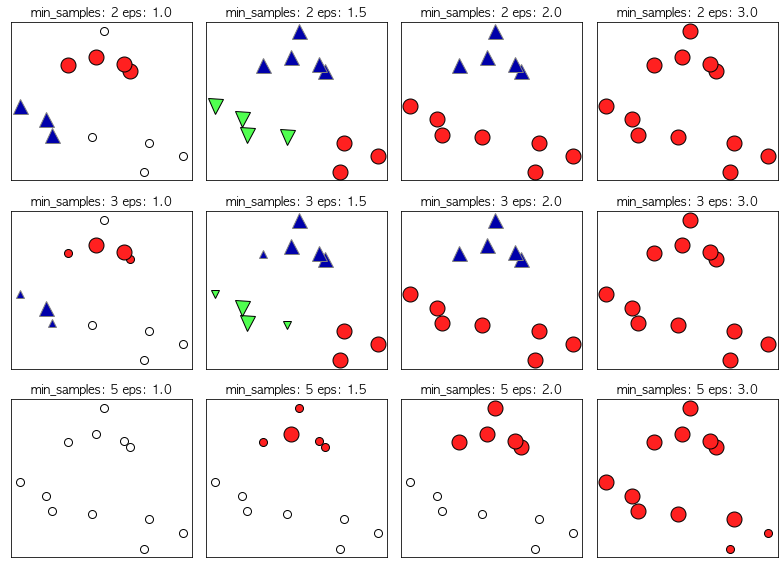

In [317]:
mglearn.plots.plot_dbscan()
plt.show()

군집이 할당된 데이터는 색을 칠하고 잡음 포인트는 하얀색으로 남김

핵심포인트는 크게 경계 포인트는 작게 표시

eps를 증가시키면(L -> R) 군집 안에 더 많은 포인트가 포함

이는 클러스터를 커지게 하지만 여러 클러스터가 합쳐지기도 함

min_samples를 키우면(T -> B) 핵심 포인트 수가 줄고 잡음 포인트가 증가

In [335]:
from sklearn.datasets import make_moons

In [339]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

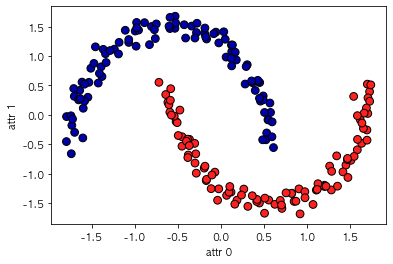

In [340]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("attr 0")
plt.ylabel("attr 1")
plt.show()

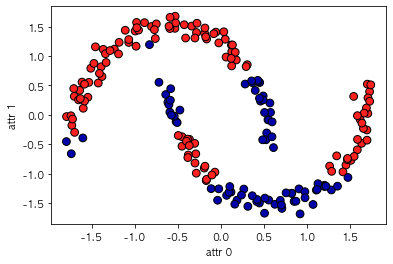

In [341]:
dbscan = DBSCAN(eps = .2)
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("attr 0")
plt.ylabel("attr 1")
plt.show()

***
### OPTICS

- OPTICS는 군집화 구조 식별을 위해 부가적 순서를 생성하는 기법

In [351]:
from sklearn.cluster import OPTICS

In [358]:
optics = OPTICS(metric = 'euclidean', min_samples = 30)

In [359]:
df['optics_cls'] = optics.fit_predict(df)

In [360]:
pd.crosstab(df.optics_cls, df['credit.rating'])

credit.rating,0,1
optics_cls,,
-1,144,303
0,25,49
1,8,39
2,14,24
3,17,33
4,23,47
5,11,33
6,16,51
7,11,29


***
## 군집 평가 하기

### 1. 타깃값으로 군집 평가하기
- ARI(Adjusted Rand Index)
- NMI(Normalized Mutual Information)

둘 다 1에 가까울수록 우수한 성능

In [342]:
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score

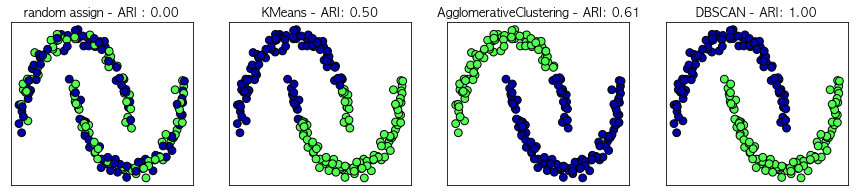

In [345]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks':(), 'yticks':()})

# 3가지 알고리즘들 리스트
algos = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_cluster = random_state.randint(low=0, high=2, size=len(X))

# 무작위로 할당한 클러스터
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_cluster, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("random assign - ARI : {:.2f}".format(adjusted_rand_score(y, random_cluster)))

for ax, algo in zip(axes[1:], algos):
    clusters = algo.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algo.__class__.__name__, adjusted_rand_score(y, clusters)))
plt.show()

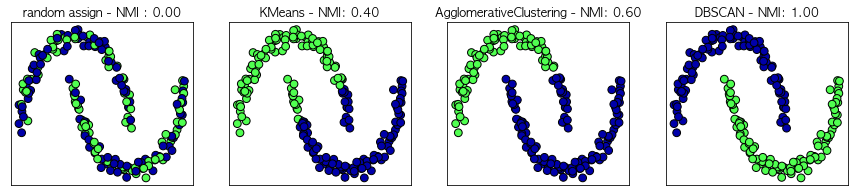

In [350]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks':(), 'yticks':()})

# 3가지 알고리즘들 리스트
algos = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_cluster = random_state.randint(low=0, high=2, size=len(X))

# 무작위로 할당한 클러스터
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_cluster, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("random assign - NMI : {:.2f}".format(adjusted_rand_score(y, random_cluster)))
for ax, algo in zip(axes[1:], algos):
    clusters = algo.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - NMI: {:.2f}".format(algo.__class__.__name__, normalized_mutual_info_score(y, clusters)))
plt.show()

***
### 2. 타깃값 없이 군집 평가 - 실루엣 계수
- ARI, NMI는 실제 정답 클러스터와 비교하여 평가할 수 있는 지표
- 실루엣 점수는 클러스터의 밀집정도를 계산하는 것으로 높을수록 좋고 최대 1이다.

#### 실루엣 분석
- 각 군집간의 거리가 얼마나 효율적으로 분리돼 있는지 나타낸다.
- 개별 데이터가 가지는 실루엣 계수는 각 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화 되어 있고 다른 군집에 있는 데이터와는 얼마나 멀리 떨어져 있는지 나타낸다.
- -1에서 1 사이의 값을 가지며 1에 가까울수록 근처의 군집과 더 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가깝다는 의미
- -는 아예 다른 군집에 데이터가 할당됐음을 의미
- 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균과 큰 차이가 나지 않는 것이 중요하다.
- 만약 전체 실루엣 계수의 평균은 높지만 특정 군집의 계수 평균만 높고 다른 군집들은 낮으면 좋은 군집화 조건이 아님.

### 실습에 적용

In [361]:
import datetime as dt

In [363]:
data = pd.read_excel('/Users/kisehyun/study_code/ADP/Online Retail.xlsx')

In [364]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [365]:
data = data[(data.Quantity > 0) & (data.UnitPrice > 0) & (data.CustomerID.notnull()) & (data.Country == 'United Kingdom')]

#### RFM 기반 데이터 전처리

In [366]:
data['sale_amount'] = data['Quantity'] * data['UnitPrice']

In [367]:
data['CustomerID'] = data['CustomerID'].astype(int)

In [368]:
cust_df = data.groupby('CustomerID').agg({'InvoiceDate' : 'max', 'InvoiceNo' : 'count', 'sale_amount' : 'sum'})

In [369]:
cust_df.head()

,InvoiceDate,InvoiceNo,sale_amount
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12747,2011-12-07 14:34:00,103,4196.01
12748,2011-12-09 12:20:00,4595,33719.73
12749,2011-12-06 09:56:00,199,4090.88
12820,2011-12-06 15:12:00,59,942.34


In [370]:
cust_df.columns = ['Recency', 'Frequency', 'Monetary']

In [371]:
cust_df = cust_df.reset_index()

In [372]:
cust_df.Recency = dt.datetime(2011, 12, 10) - cust_df.Recency

In [373]:
cust_df.Recency = cust_df.Recency.apply(lambda x : x.days + 1)

In [377]:
cust_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73
3,12749,4,199,4090.88
4,12820,4,59,942.34


In [374]:
scaler = StandardScaler()

In [375]:
scaled_df = scaler.fit_transform(cust_df[['Recency', 'Frequency', 'Monetary']])

In [379]:
km = KMeans(n_clusters = 3, random_state = 326)
km_labels = km.fit_predict(scaled_df)

gmm = GaussianMixture(n_components = 3, random_state = 326)
gmm_labels = gmm.fit_predict(scaled_df)

db = DBSCAN()
db_labels = db.fit_predict(scaled_df)

op = OPTICS()
op_labels = op.fit_predict(scaled_df)

In [380]:
cust_df['km클러스터'] = km_labels
cust_df['gmm클러스터'] = gmm_labels
cust_df['db클러스터'] = db_labels
cust_df['op클러스터'] = op_labels

In [381]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [383]:
km_sil_score = silhouette_samples(scaled_df, km_labels)
gmm_sil_score = silhouette_samples(scaled_df, gmm_labels)
db_sil_score = silhouette_samples(scaled_df, db_labels)
op_sil_score = silhouette_samples(scaled_df, op_labels)

In [384]:
cust_df['km실루엣계수'] = km_sil_score
cust_df['gmm실루엣계수'] = gmm_sil_score
cust_df['db실루엣계수'] = db_sil_score
cust_df['op실루엣계수'] = op_sil_score

특정 군집의 실루엣 계수만 높다면 우수하다고 평가할 수 없다.

In [386]:
cust_df.groupby('km클러스터').km실루엣계수.mean()

km클러스터
0    0.595770
1    0.594515
2   -0.026289
Name: km실루엣계수, dtype: float64

In [387]:
cust_df.groupby('gmm클러스터').gmm실루엣계수.mean()

gmm클러스터
0    0.394929
1    0.062156
2   -0.271934
Name: gmm실루엣계수, dtype: float64

In [388]:
cust_df.groupby('db클러스터').db실루엣계수.mean()

db클러스터
-1   -0.324301
 0    0.735650
 1    0.916515
Name: db실루엣계수, dtype: float64

In [389]:
cust_df.groupby('op클러스터').op실루엣계수.mean()

op클러스터
-1     -0.896651
 0      0.730222
 1      0.725401
 2      0.407895
 3      0.360062
          ...   
 158    0.736976
 159    0.770269
 160    0.667718
 161    0.650008
 162    0.677243
Name: op실루엣계수, Length: 164, dtype: float64

In [390]:
def visualize_silhouette(cluster_list, X) : 
    import matplotlib.cm as cm
    import math
    range_n_clusters = [2, 3, 4, 5, 6]

    for n_cluster in cluster_list :

        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_cluster + 1) * 10])
        clusterer = KMeans(n_clusters = n_cluster, random_state = 326)
        cluster_labels = clusterer.fit_predict(X)


        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_cluster,
              "The average silhouette_score is :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_cluster):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_cluster),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5666305694457564
For n_clusters = 3 The average silhouette_score is : 0.5924537813510861
For n_clusters = 4 The average silhouette_score is : 0.5950344972510845
For n_clusters = 5 The average silhouette_score is : 0.6164139014342273


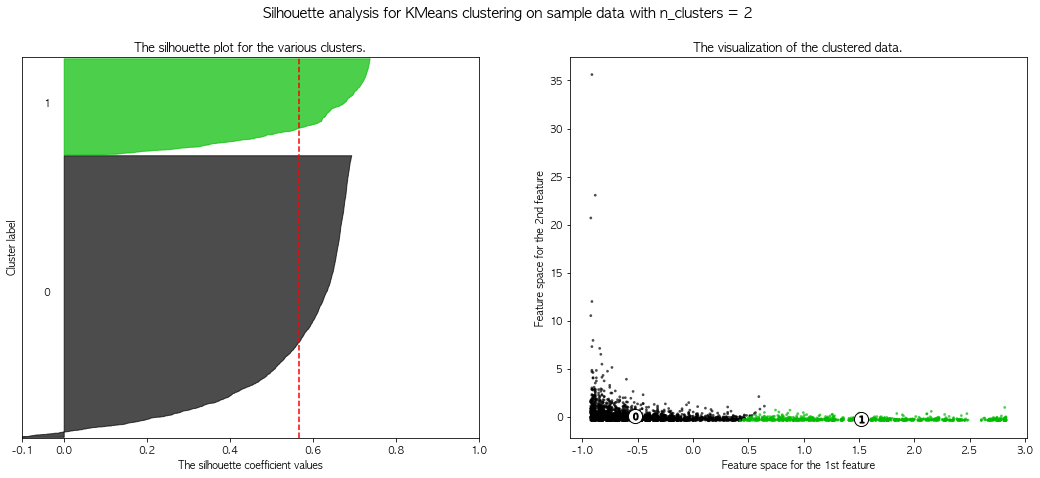

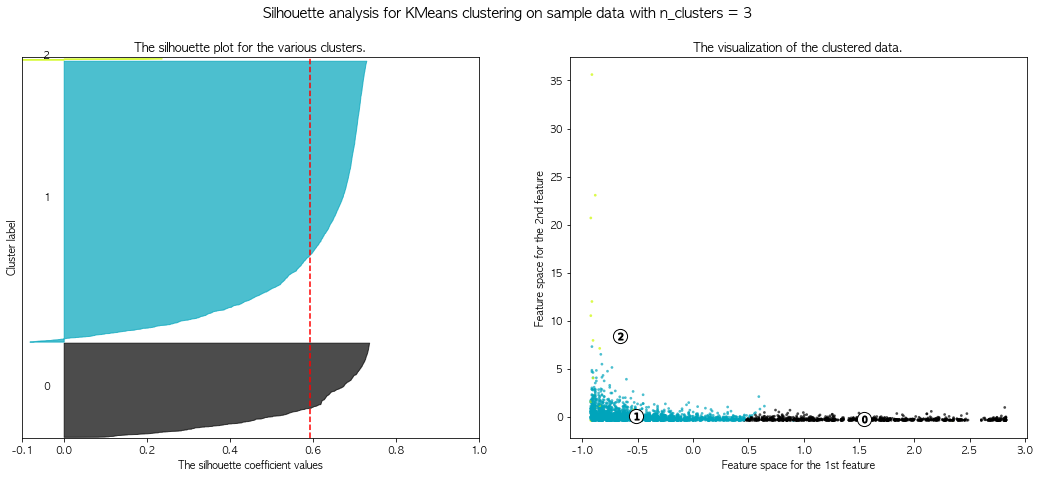

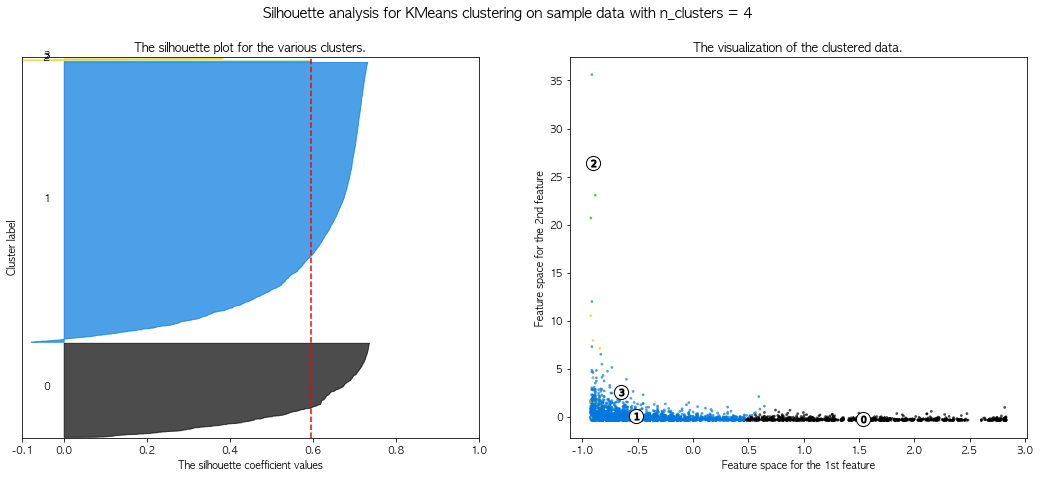

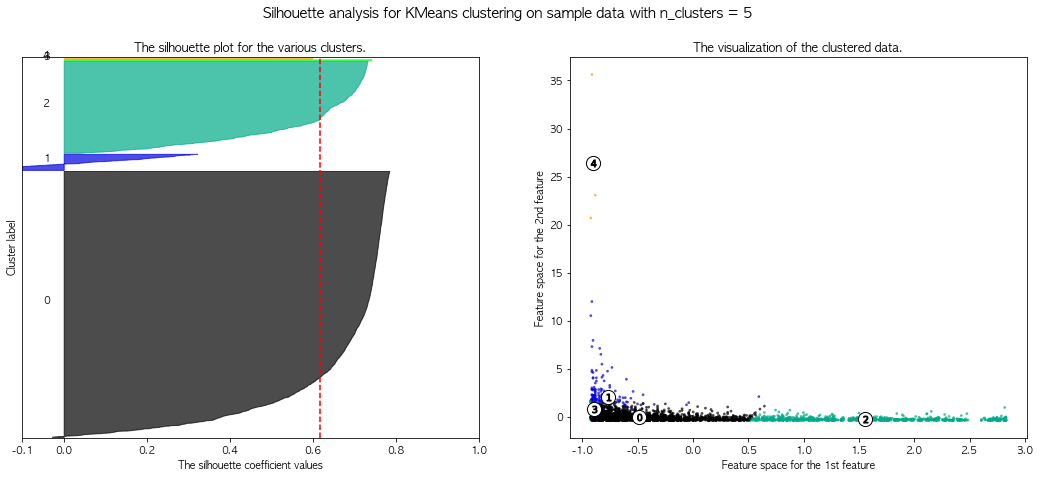

In [391]:
visualize_silhouette([2,3,4,5], scaled_df)

군집의 수가 3일 때는 2번 군집의 데이터 수가 너무 적은 군집이 생성된다.

In [392]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

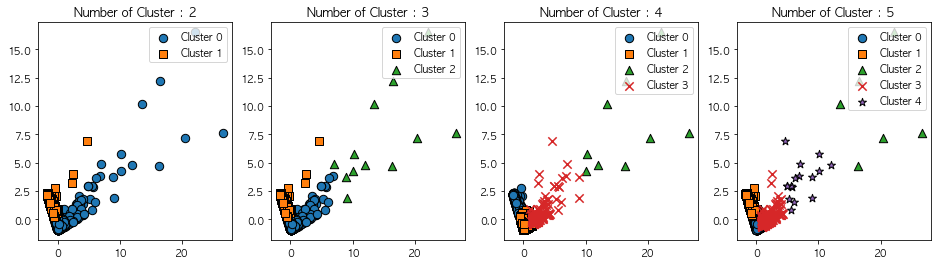

In [393]:
visualize_kmeans_plot_multi([2,3,4,5],scaled_df)

#### 데이터의 왜곡 정도가 심한 경우 로그변환을 취하면 개선이 가능하다.

In [394]:
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

In [395]:
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.4000433430356038
For n_clusters = 3 The average silhouette_score is : 0.3031672668045423
For n_clusters = 4 The average silhouette_score is : 0.30606173217560745
For n_clusters = 5 The average silhouette_score is : 0.2787765988815527


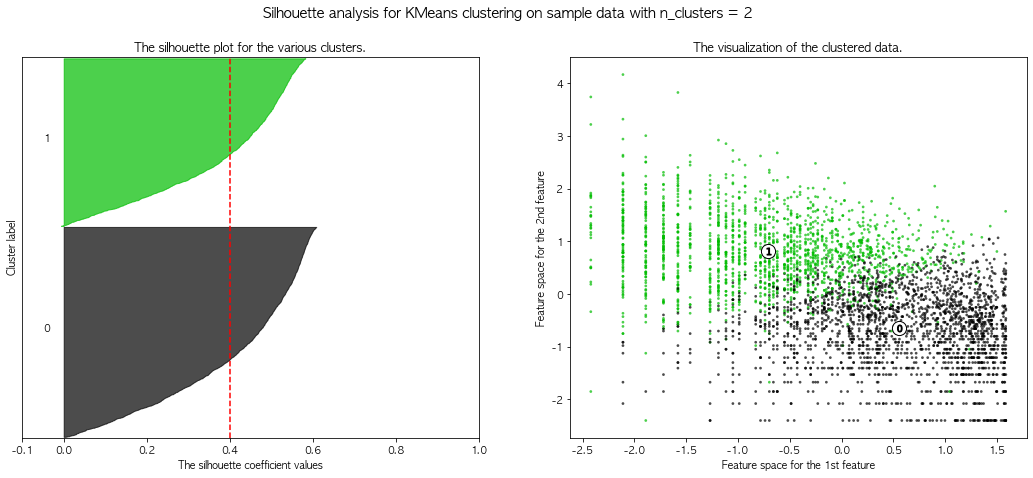

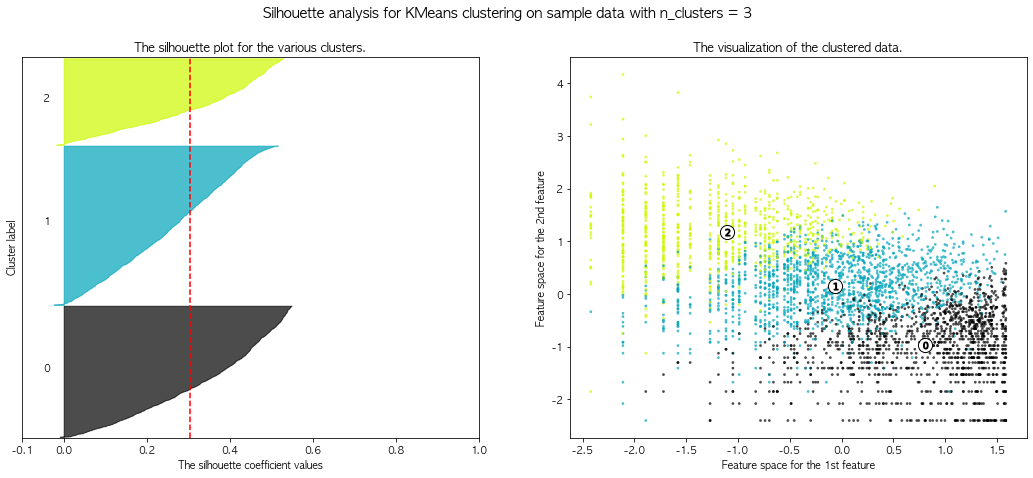

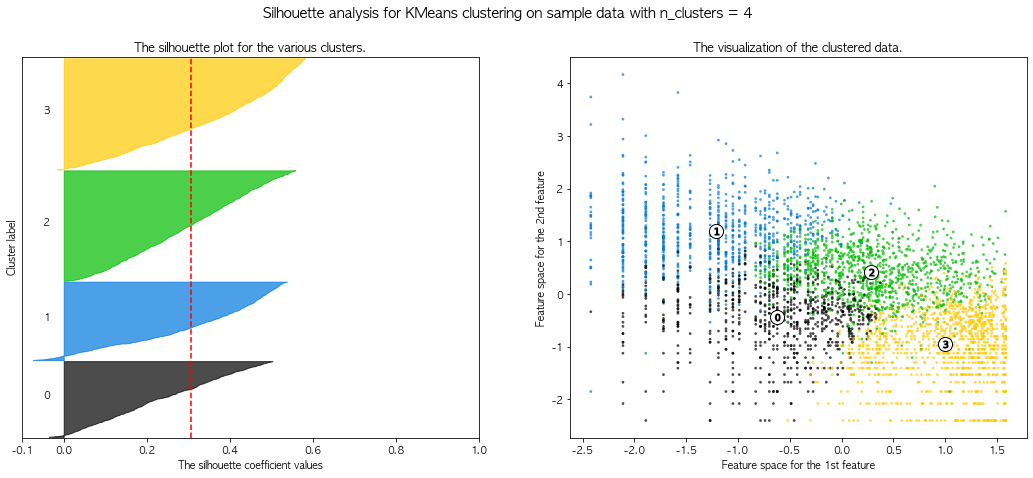

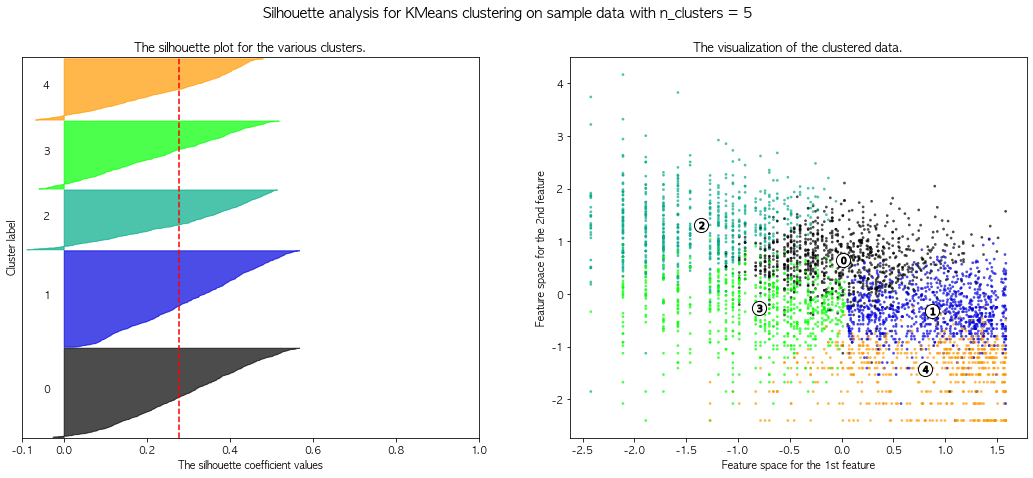

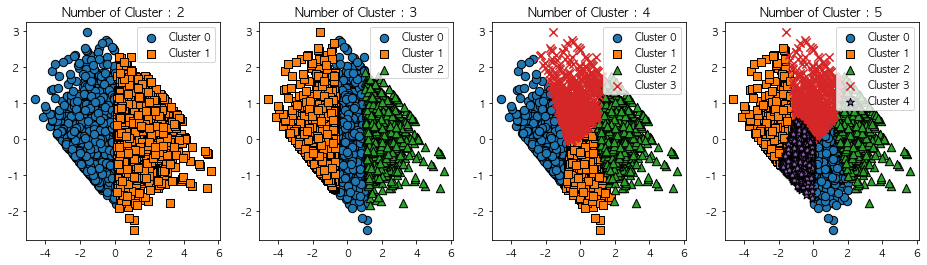

In [396]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

실루엣 스코어는 떨어지지만 균일성 측면에서는 이전보다 개선되었다.